# 라이브러리 불러오기

# Null 값 확인
1. format 형식
2. msno 사용

# Target의 분포 경향 확인

# EDA - Pclass : groupby, crosstab, pandas plot(평균생존률)
# EDA - Sex : 성별 별로 생존 수와 생존률, crosstab, factorplot
# EDA - Age : 최연장자, 최연소자, 평균, kdeplot

In [475]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.5)
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [476]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
for i in df_train.columns :
    bottom = len(df_train[i])
    top = df_train[i].isnull().sum()
    ratio = 100*(top/bottom)
    print('column : {:>13} Percent of NaN Value : {:.2f}%'.format(i,ratio))

column :   PassengerId Percent of NaN Value : 0.00%
column :      Survived Percent of NaN Value : 0.00%
column :        Pclass Percent of NaN Value : 0.00%
column :          Name Percent of NaN Value : 0.00%
column :           Sex Percent of NaN Value : 0.00%
column :           Age Percent of NaN Value : 19.87%
column :         SibSp Percent of NaN Value : 0.00%
column :         Parch Percent of NaN Value : 0.00%
column :        Ticket Percent of NaN Value : 0.00%
column :          Fare Percent of NaN Value : 0.00%
column :         Cabin Percent of NaN Value : 77.10%
column :      Embarked Percent of NaN Value : 0.22%


In [21]:
for i in df_test.columns :
    bottom = len(df_train[i])
    top = df_test[i].isnull().sum()
    ratio = 100*(top/bottom)
    print('column : {:>13} Percent of NaN Value : {:.2f}%'.format(i,ratio))

column :   PassengerId Percent of NaN Value : 0.00%
column :        Pclass Percent of NaN Value : 0.00%
column :          Name Percent of NaN Value : 0.00%
column :           Sex Percent of NaN Value : 0.00%
column :           Age Percent of NaN Value : 9.65%
column :         SibSp Percent of NaN Value : 0.00%
column :         Parch Percent of NaN Value : 0.00%
column :        Ticket Percent of NaN Value : 0.00%
column :          Fare Percent of NaN Value : 0.11%
column :         Cabin Percent of NaN Value : 36.70%
column :      Embarked Percent of NaN Value : 0.00%


<AxesSubplot:>

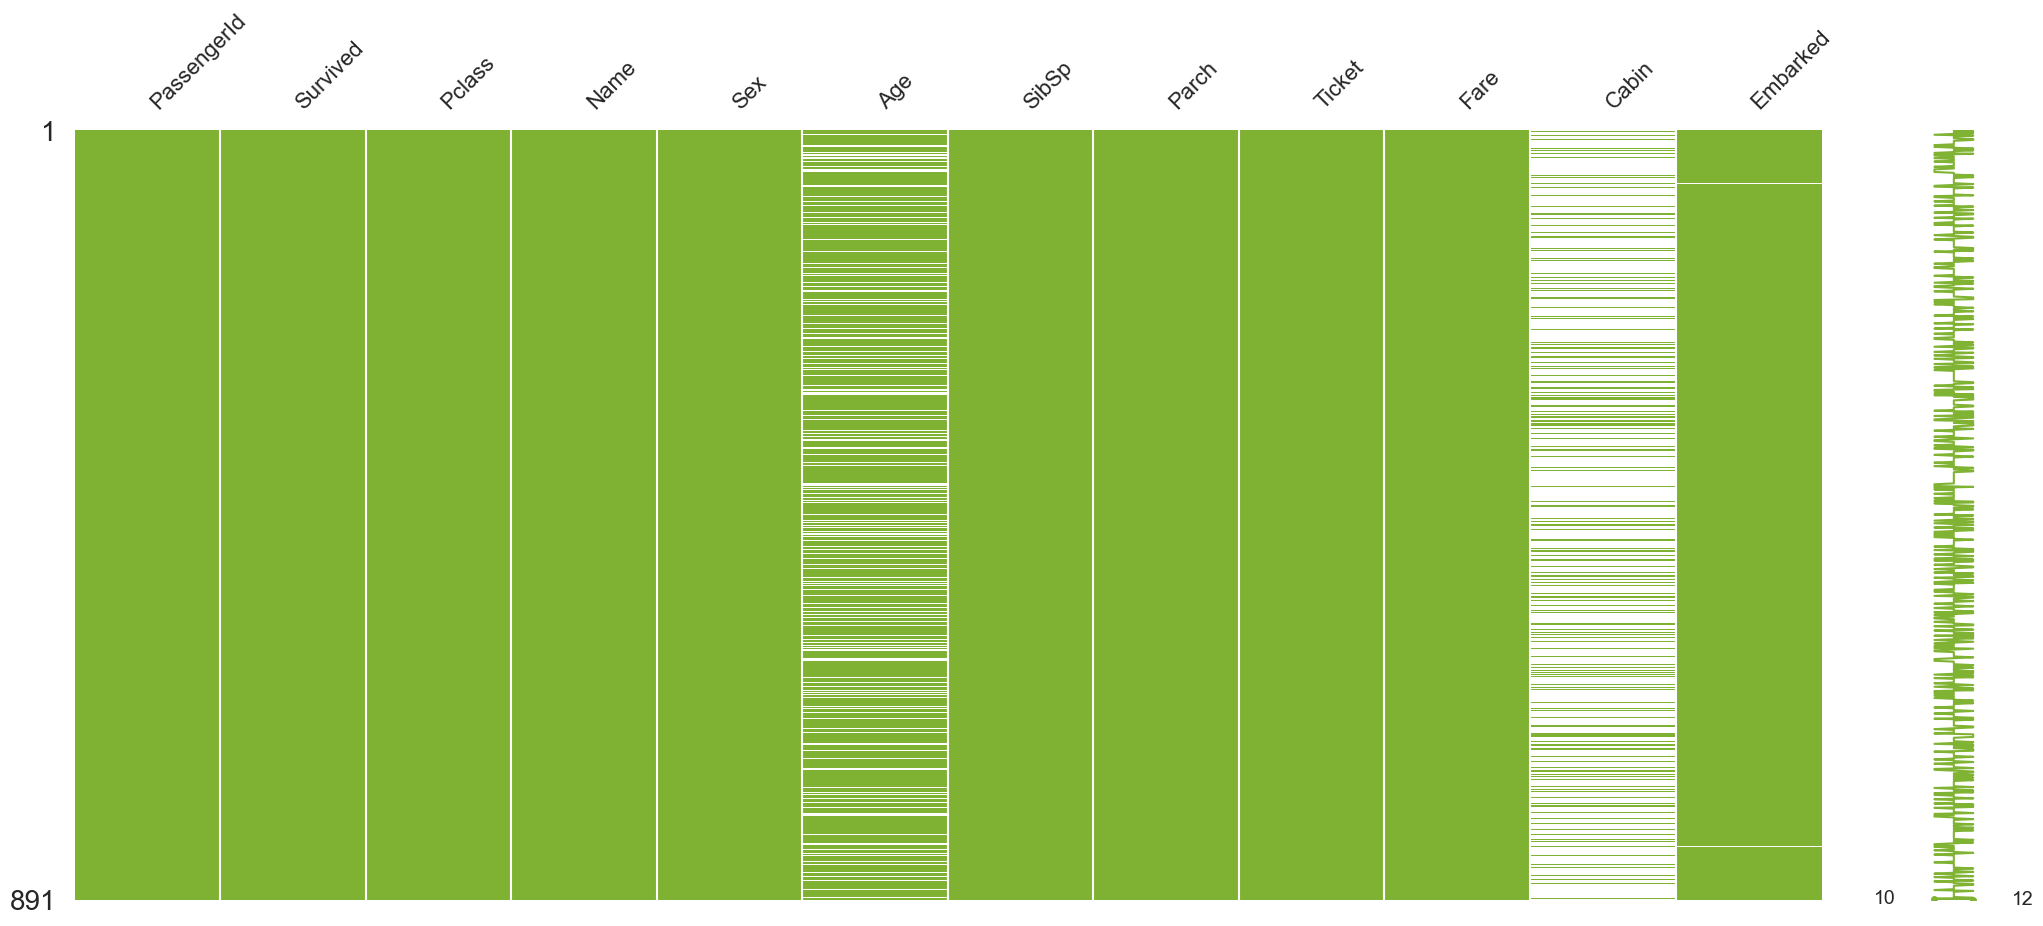

In [33]:
msno.matrix(df=df_train,color=(0.5,0.7,0.2))

<AxesSubplot:>

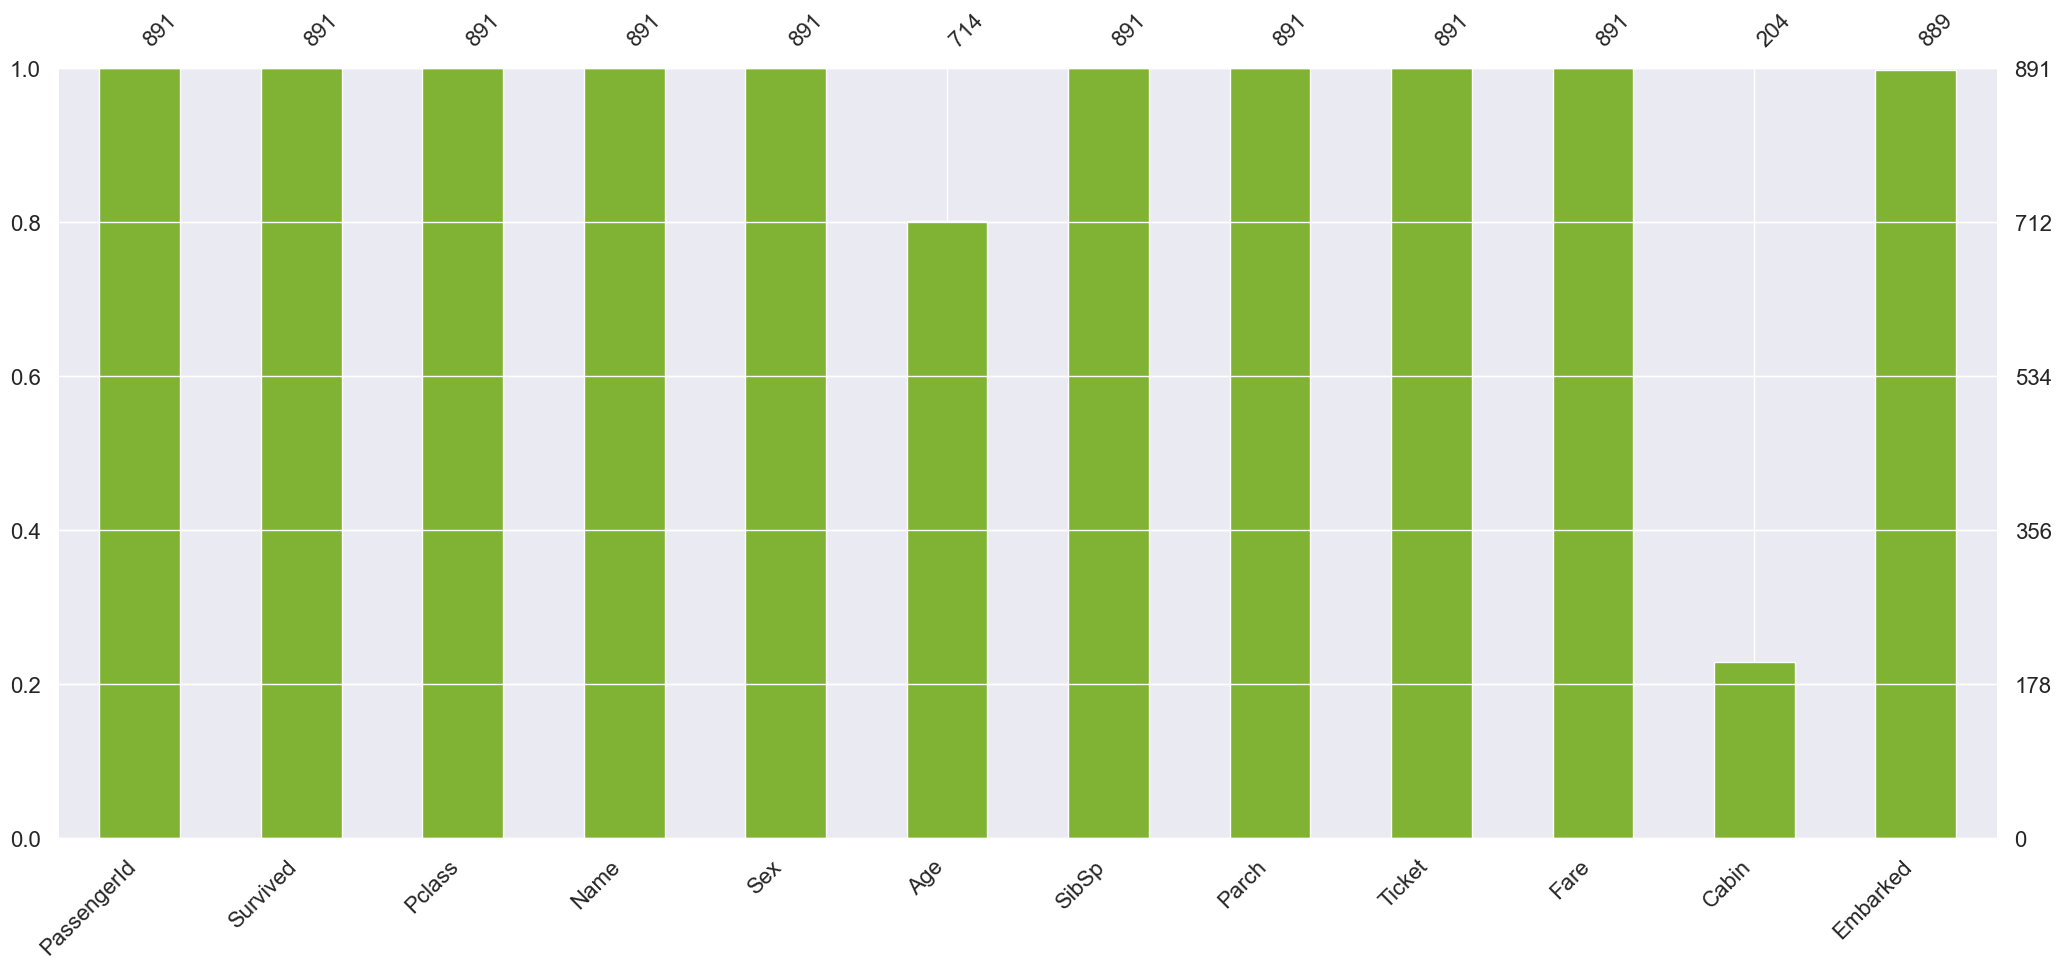

In [32]:
msno.bar(df=df_train,color=(0.5,0.7,0.2))

0    549
1    342
Name: Survived, dtype: int64


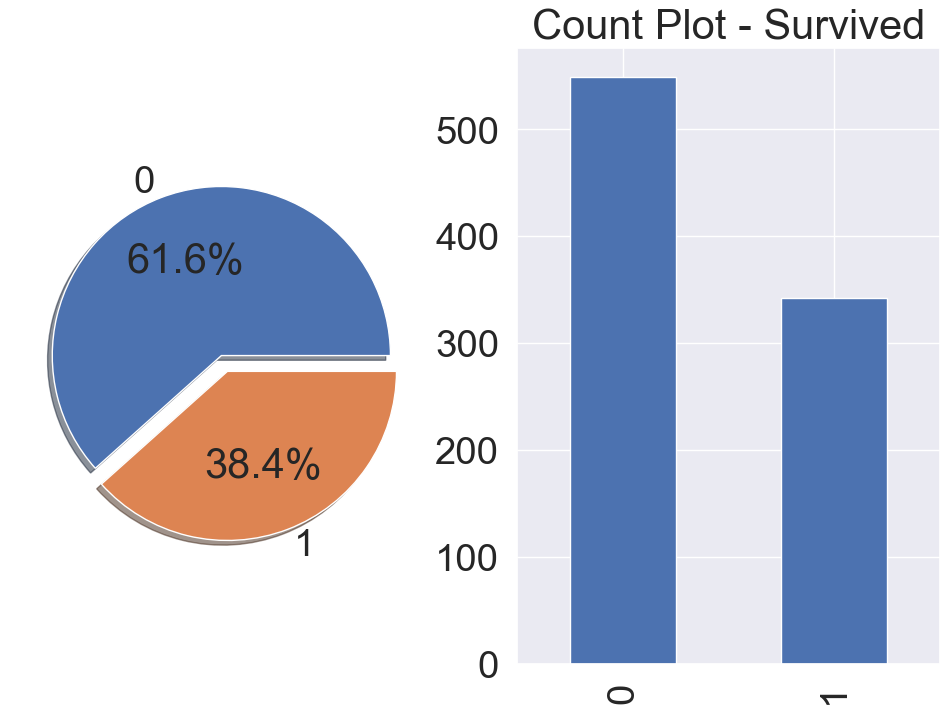

In [44]:
f,ax = plt.subplots(1,2,figsize=(12,8))
print(df_train['Survived'].value_counts())
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],ax=ax[0],shadow=True,autopct='%1.1f%%')
ax[0].set_ylabel('')

df_train['Survived'].value_counts().plot.bar(ax=ax[1])
ax[1].set_title('Count Plot - Survived')

plt.show()

In [60]:
# print(df_train.groupby(by='Pclass',as_index=True)[['Survived']].count()) # [['Pclass','Survived']]
print(df_train['Pclass'].value_counts())
print(df_train.groupby(by='Pclass',as_index=True)[['Survived']].sum())

3    491
1    216
2    184
Name: Pclass, dtype: int64
        Survived
Pclass          
1            136
2             87
3            119


In [66]:
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


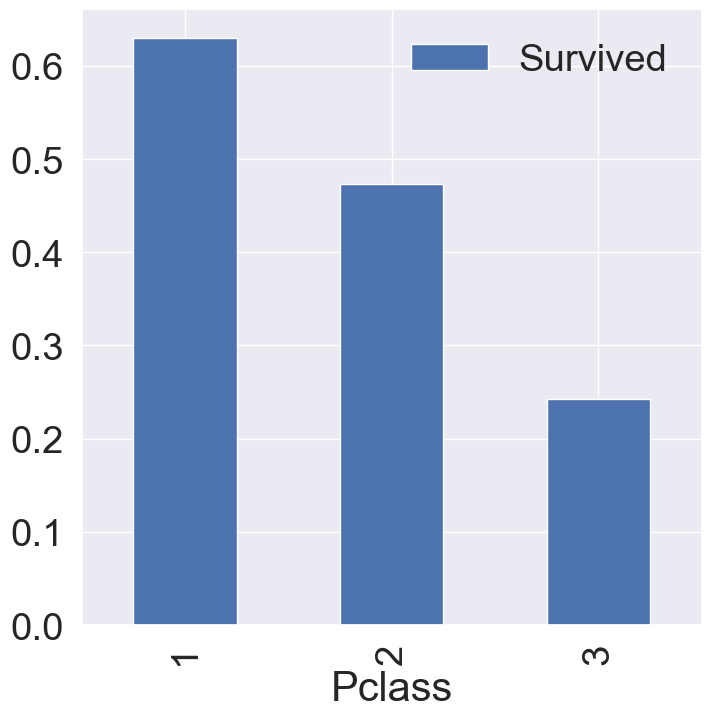

In [76]:
f,ax = plt.subplots(1,1,figsize=(8,8))
df_train[['Pclass','Survived']].groupby('Pclass',as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax)
plt.show()

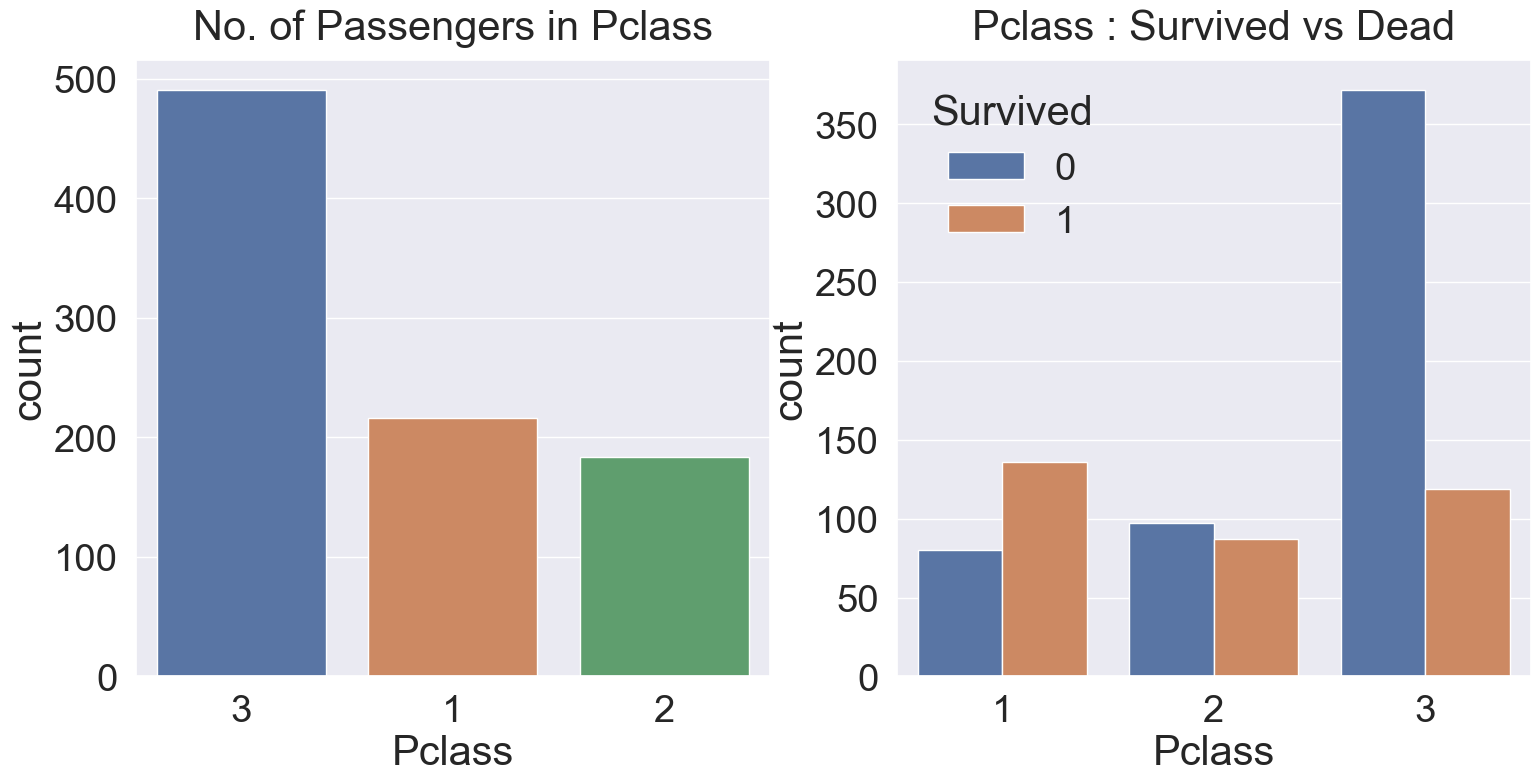

In [92]:
y_position = 1.02
f,ax = plt.subplots(1,2,figsize=(18,8))

sns.countplot(data=df_train,x='Pclass',ax=ax[0], order=[3,1,2]) # df_train['Pclass'].value_counts().index
ax[0].set_title('No. of Passengers in Pclass', y=y_position)
sns.countplot(data=df_train,x='Pclass',hue='Survived',ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y=y_position)

plt.show()

Text(0.5, 1.0, 'Sex : Survived vs Dead')

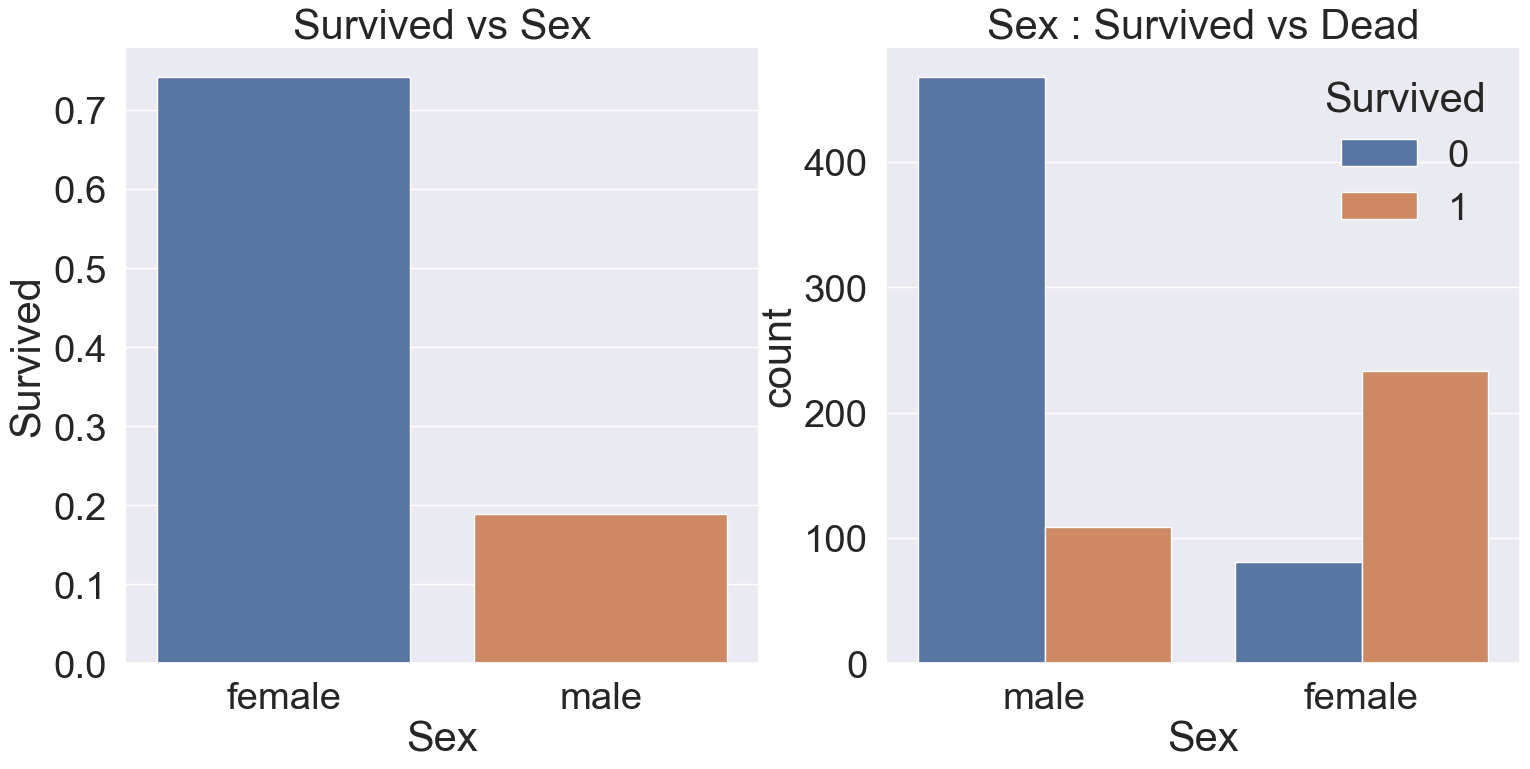

In [106]:
f,ax = plt.subplots(1,2,figsize=(18,8))
# sns.countplot(data=df_train,x='Sex',ax=ax[0])
sns.barplot(data = df_train[['Sex','Survived']].groupby(by='Sex',as_index=False).mean(), x='Sex',y='Survived',ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(data=df_train,x='Sex',hue='Survived',ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')

In [110]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

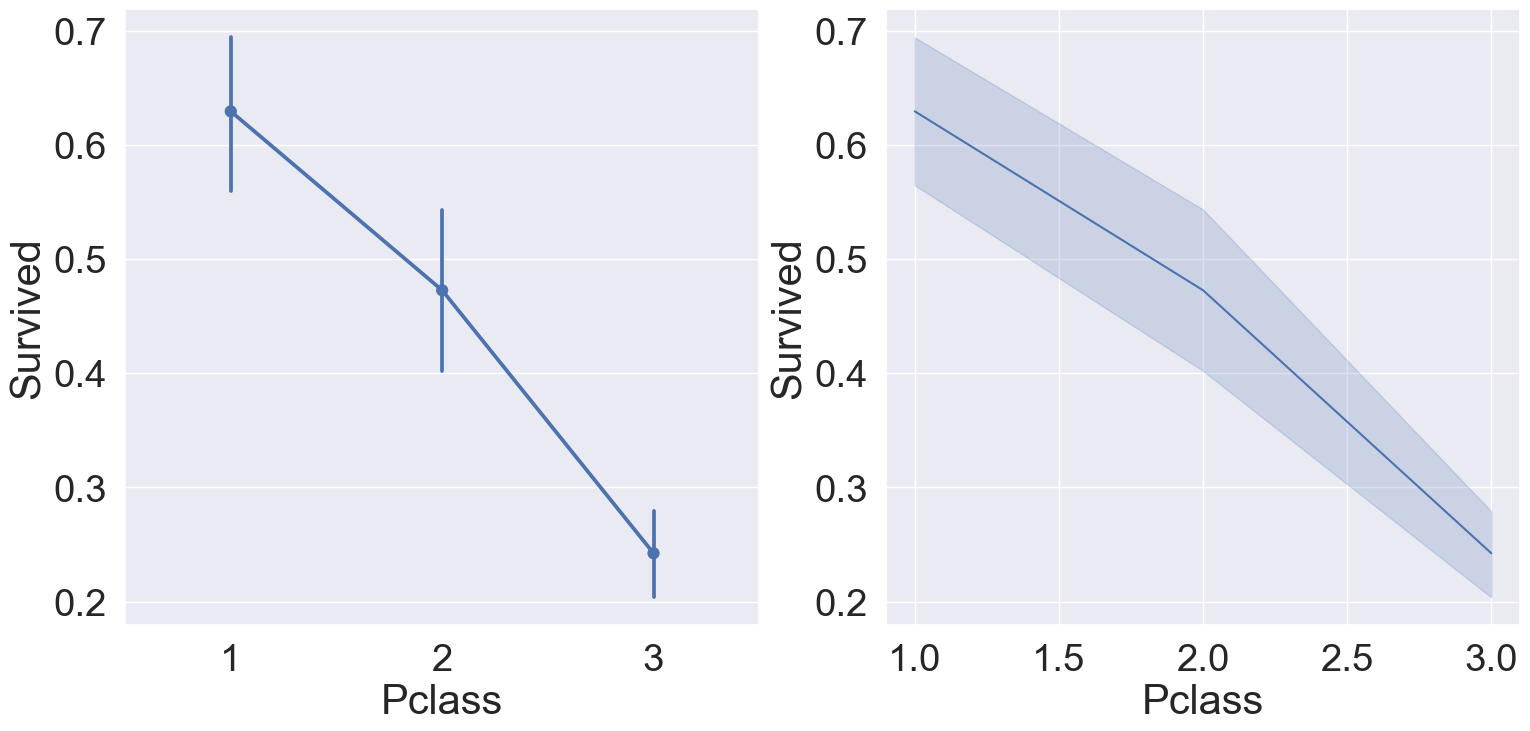

In [115]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.pointplot(data=df_train,x='Pclass',y='Survived', ax=ax[0])

sns.lineplot(data=df_train,x='Pclass',y='Survived', ax=ax[1])


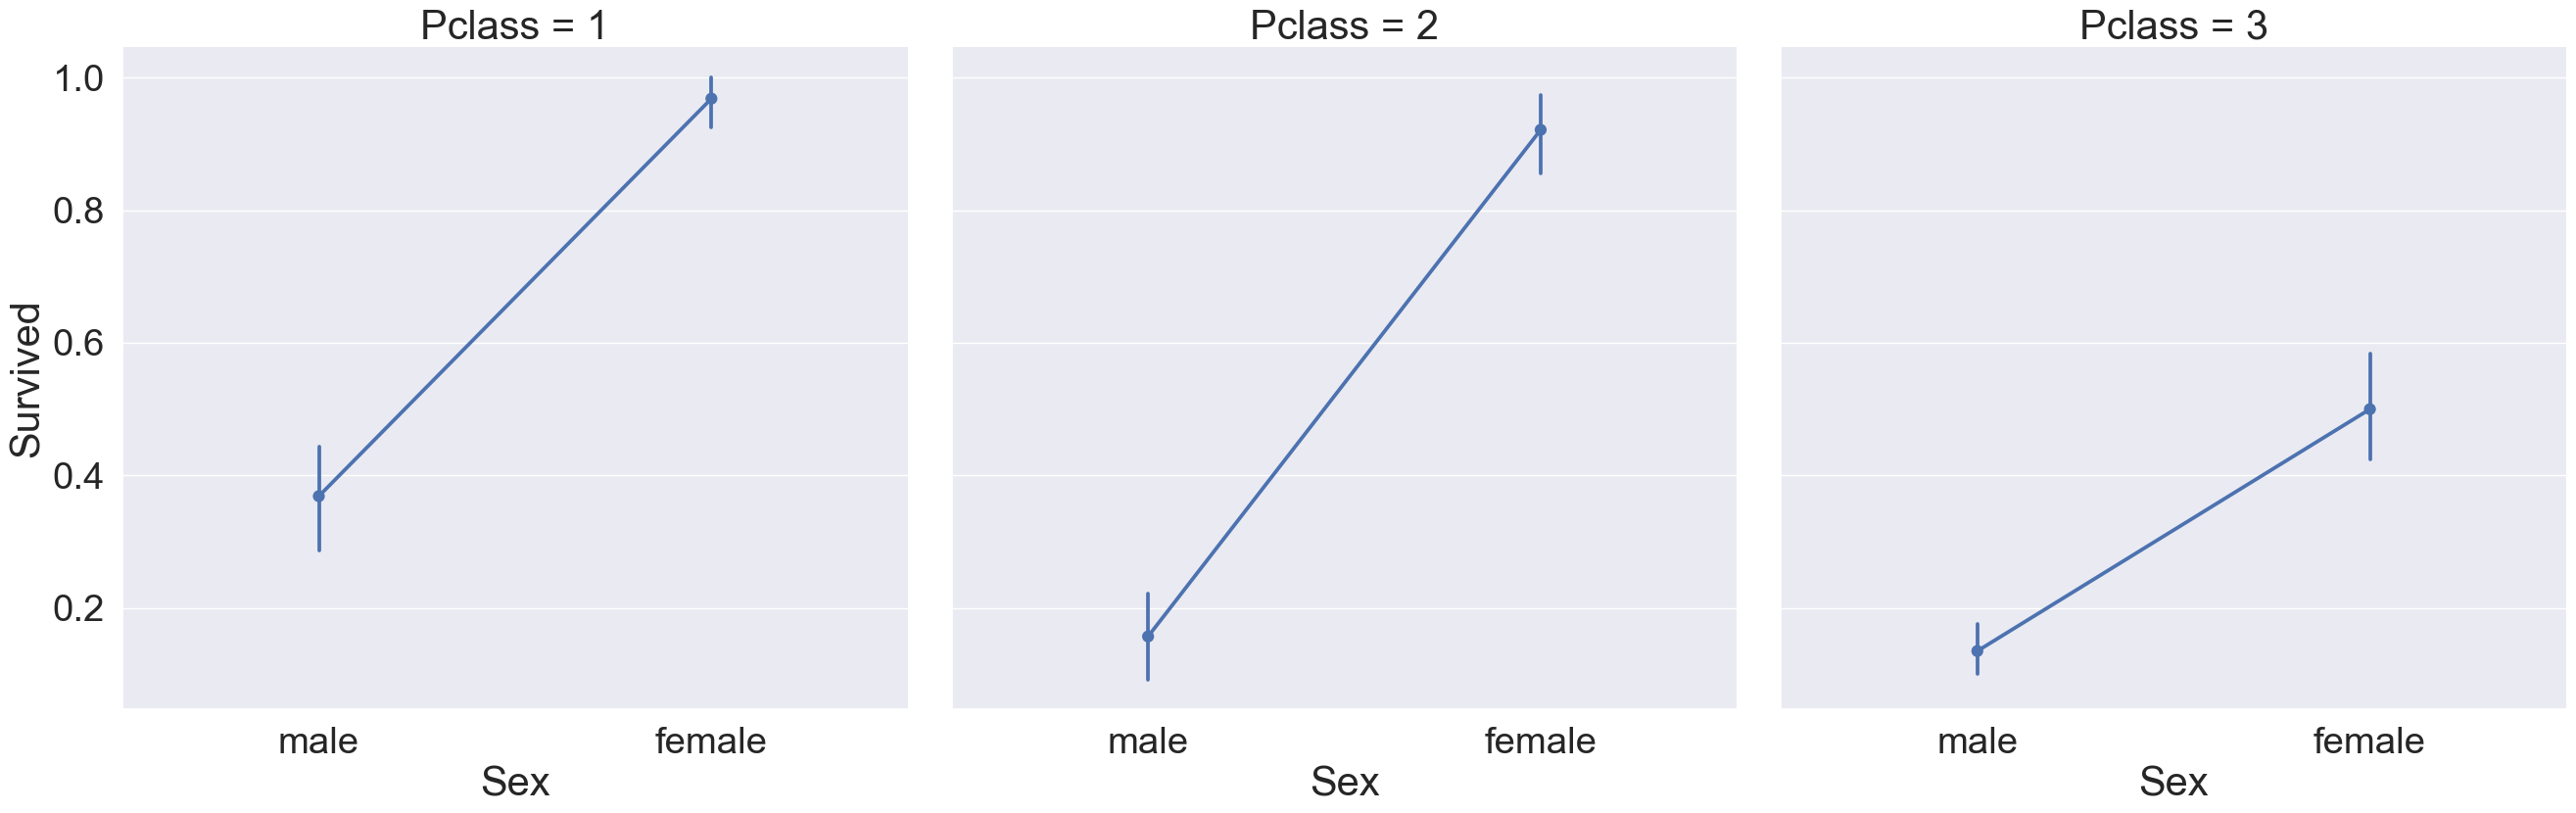

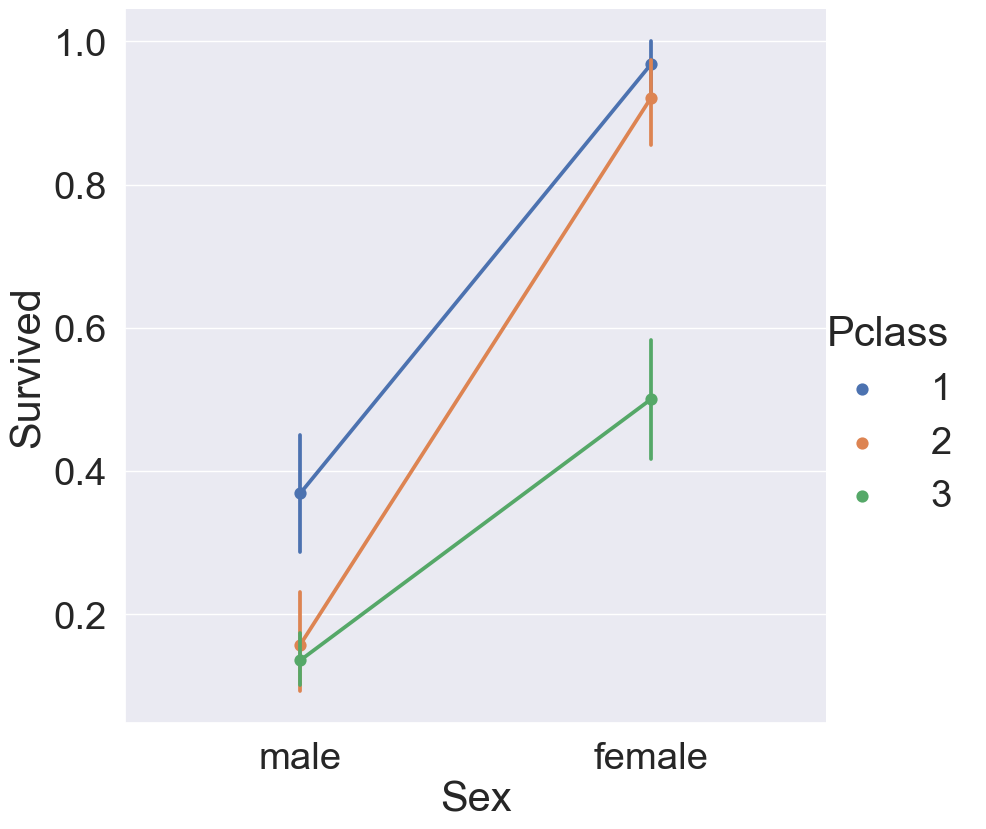

In [123]:
sns.factorplot(data=df_train,x='Sex',y='Survived',col='Pclass',size=9,ax=[0,1])
sns.factorplot(data=df_train,x='Sex',y='Survived',hue='Pclass',size=9,ax=[0,2])

In [133]:
print("최연장자 : {:>10.1f}세".format(df_train['Age'].max()))
print("평균연령 : {:>5.1f}세".format(df_train['Age'].mean()))
print("최연소자 : {:.1f}세".format(df_train['Age'].min()))

# 제일 나이 많은 탑승객 : 80.0 years

최연장자 :       80.0세
평균연령 :  29.7세
최연소자 : 0.4세


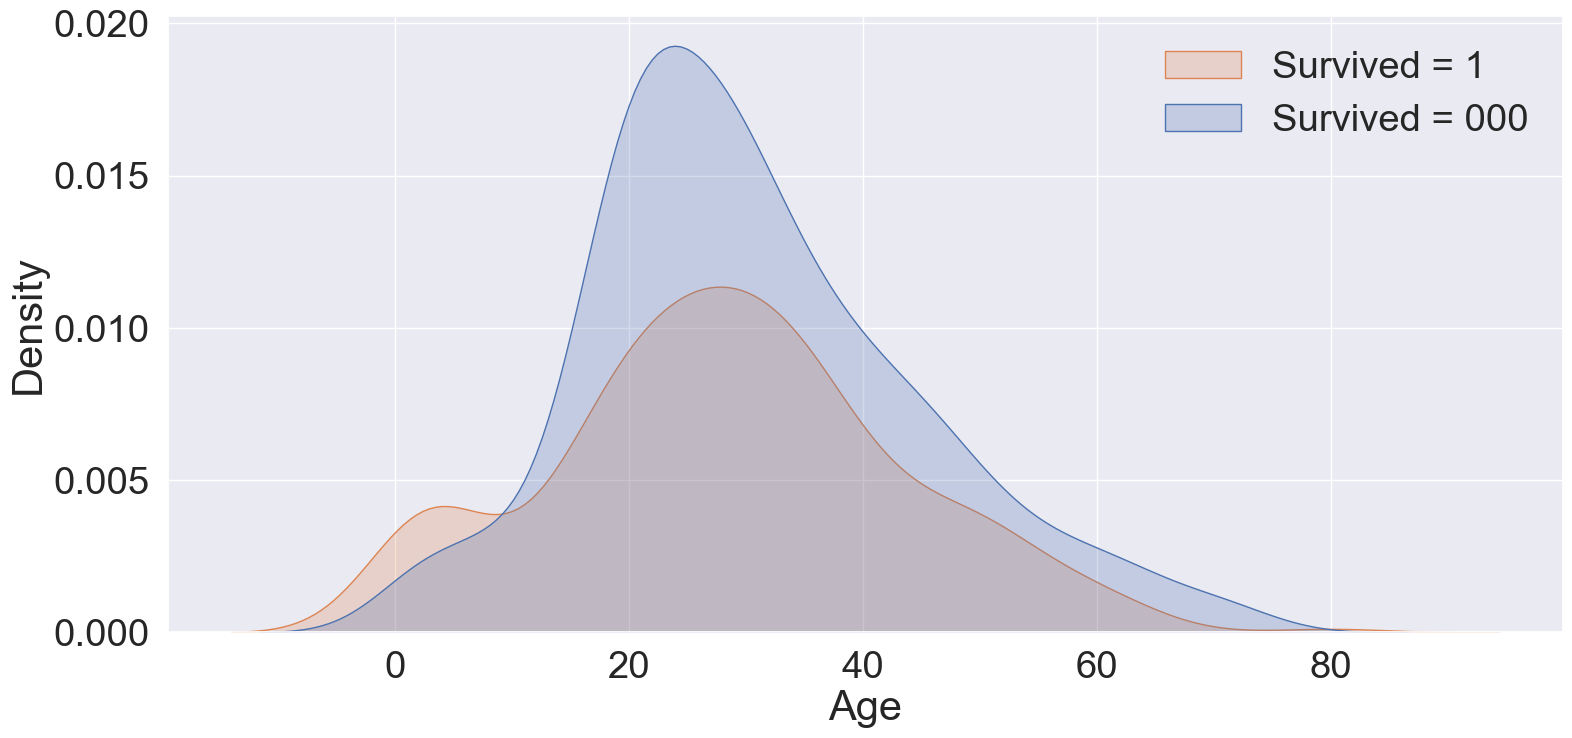

In [239]:
fig,ax = plt.subplots(1,1,figsize=(18,8))
sns.kdeplot(data=df_train, x='Age',hue='Survived',ax=ax, shade=True)
plt.legend(['Survived = 1','Survived = 000'])
plt.show()

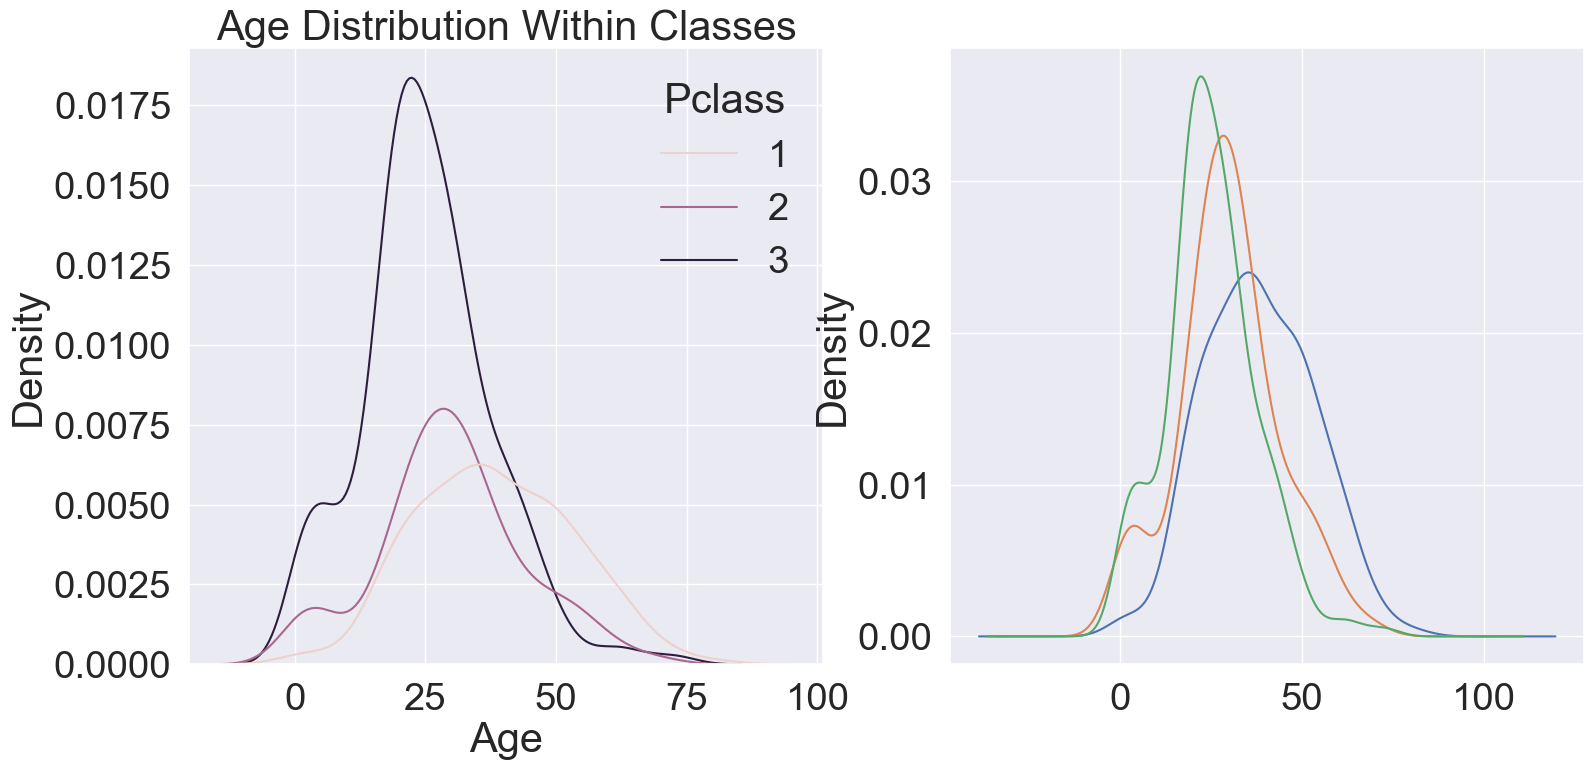

In [151]:
fig,ax = plt.subplots(1,2,figsize=(18,8))

sns.kdeplot(data=df_train, x='Age',hue='Pclass',ax=ax[0])
ax[0].set_title('Age Distribution Within Classes')

df_train[df_train['Pclass']==1]['Age'].plot(kind='kde',ax=ax[1])
df_train['Age'][df_train['Pclass']==2].plot(kind='kde',ax=ax[1])
df_train['Age'][df_train['Pclass']==3].plot(kind='kde',ax=ax[1])

plt.show()

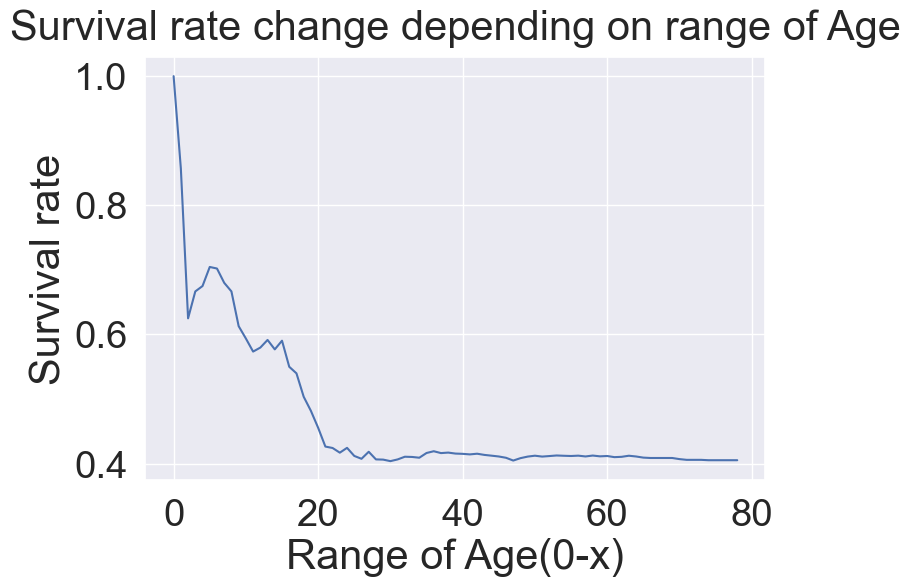

In [180]:
# 나이와 생존율은 유관한가?
# 1. 0~n세 까지의 나이와 생존률
# 2. 나이대별 생존률

######### 1 ##########
change_age_range_survival_ratio = []

for i in range(1,80) :
    d = df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived'])
    change_age_range_survival_ratio += [d]

plt.plot(change_age_range_survival_ratio)

plt.title('Survival rate change depending on range of Age',y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0-x)')
plt.show()

         Survived
Age_cat          
baby     0.680000
teen     0.454545
young    0.358896
adult    0.420495
old      0.227273


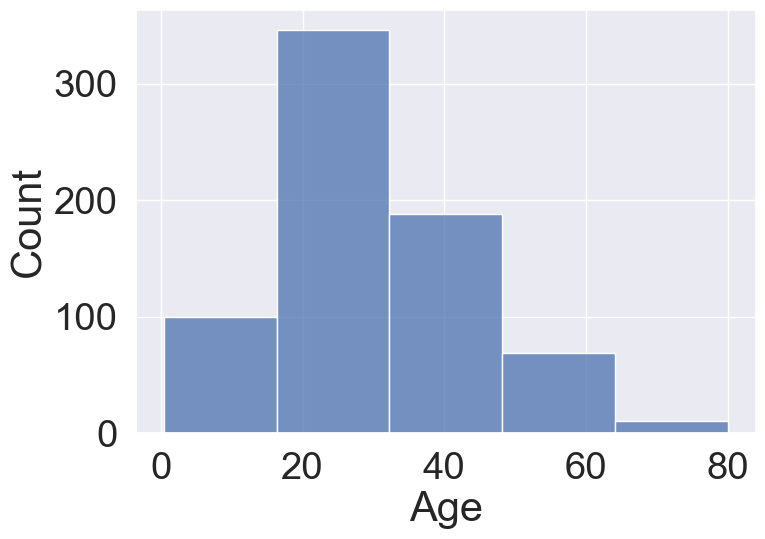

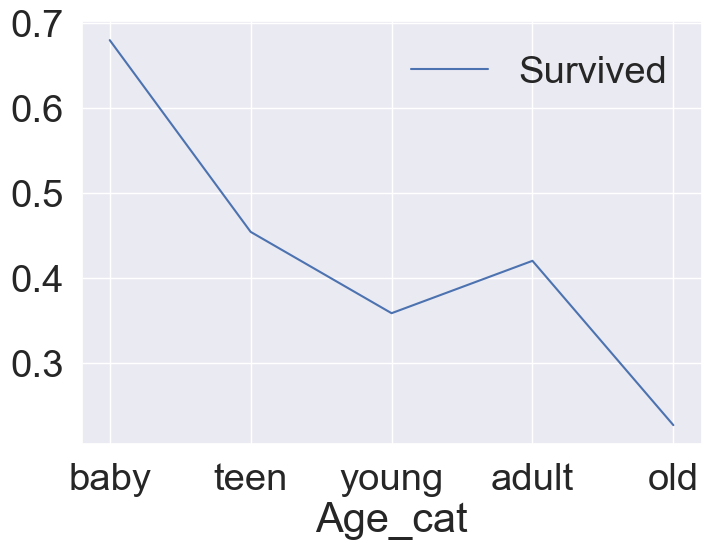

In [218]:
######### 2 ##########

sns.histplot(data=df_train, x='Age', bins=5)

df_titanic = df_train.copy()
df_titanic.head(5)
df_titanic['Age_cat'] = pd.cut(df_titanic['Age'], bins=[0, 7, 15, 30, 60, 100], labels = ['baby', 'teen', 'young', 'adult', 'old'])
df_titanic.head(5)
df_titanic[['Age_cat','Survived']].groupby(by='Age_cat').mean().plot()
print(df_titanic[['Age_cat','Survived']].groupby(by='Age_cat').mean())

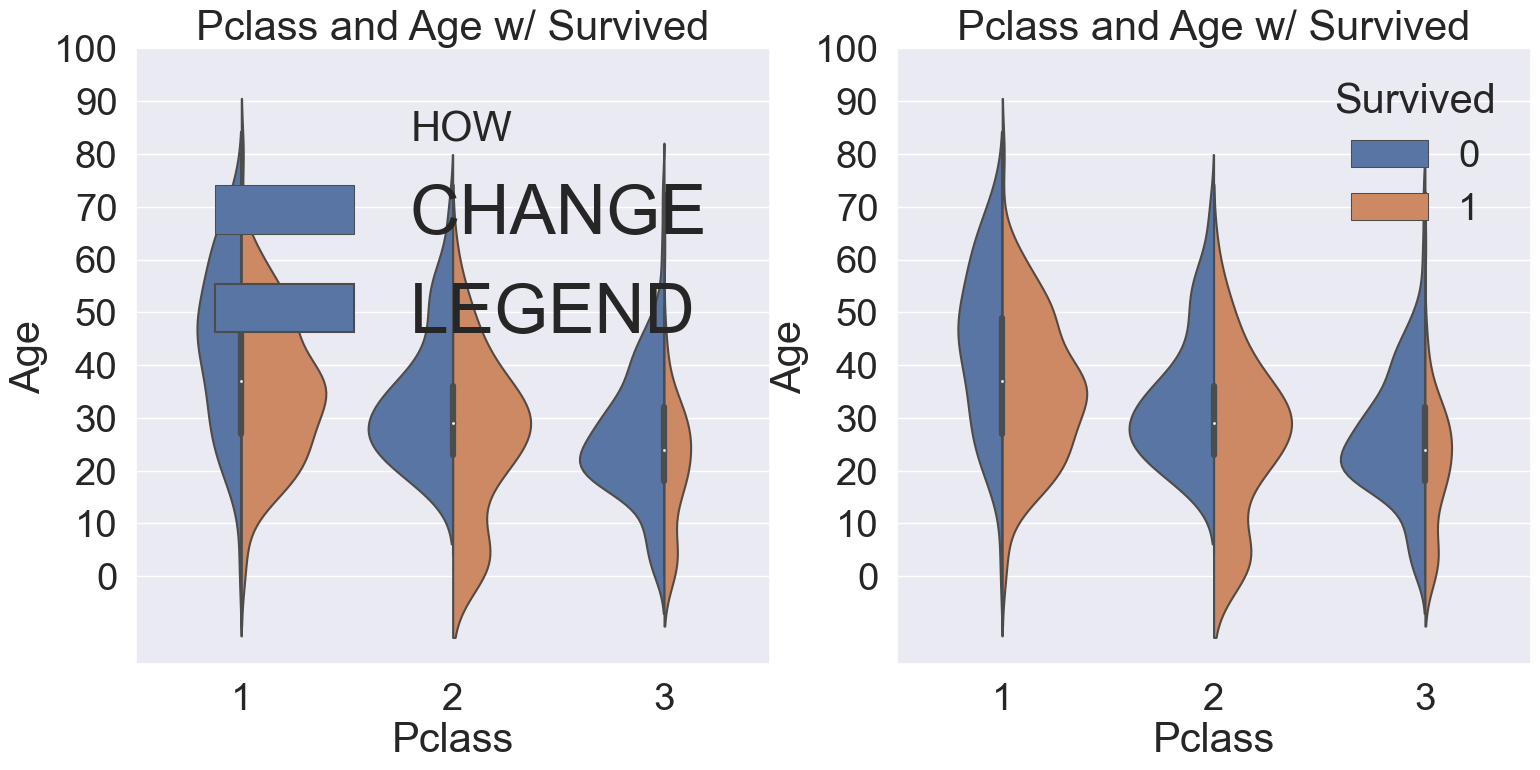

In [265]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(data=df_train, x='Pclass', y='Age', hue='Survived', ax=ax[0], scale='count', split=True)
ax[0].set_title('Pclass and Age w/ Survived')
ax[0].set_yticks(range(0,110,10))
ax[0].legend(['CHANGE','LEGEND'],title='HOW', fontsize=50)

sns.violinplot(data=df_train, x='Pclass', y='Age', hue='Survived', ax=ax[1], scale='count', split=True)
ax[1].set_title('Pclass and Age w/ Survived')
ax[1].set_yticks(range(0,110,10))
# sns.violinplot(data=df_train, x='Sex', y='Age', hue='Survived', split=True, ax=ax[1], scale='count')
# ax[1].set_title('Sex and Age /w Survived')
# ax[1].set_yticks(range(0,110,10))
plt.show()

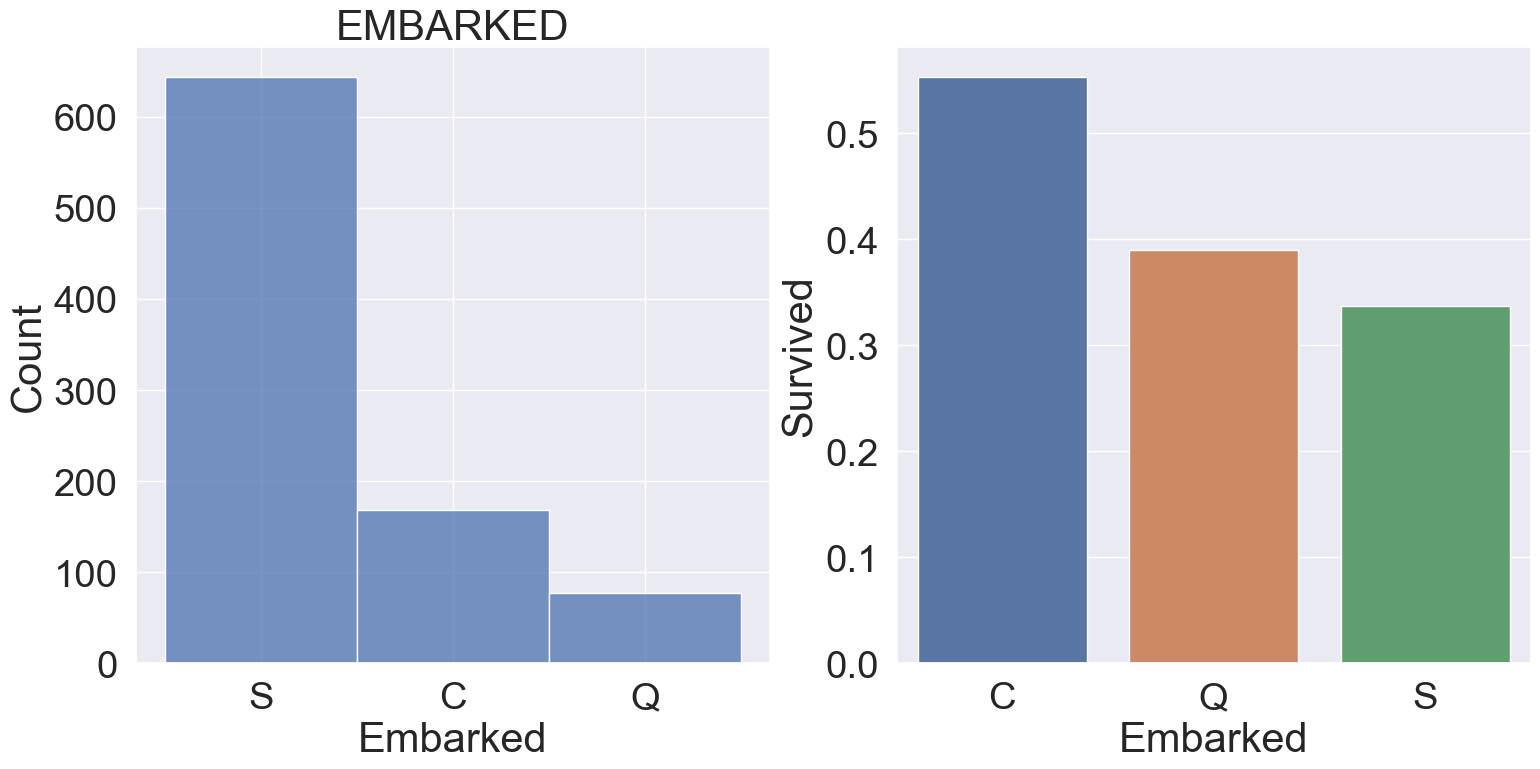

In [277]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.histplot(data=df_train[['Embarked','Survived']], x='Embarked',ax=ax[0])
ax[0].set_title('EMBARKED')
sns.barplot(data = df_train[['Embarked','Survived']].groupby(by='Embarked',as_index=False).mean(),x='Embarked',y='Survived',ax=ax[1])
plt.show()

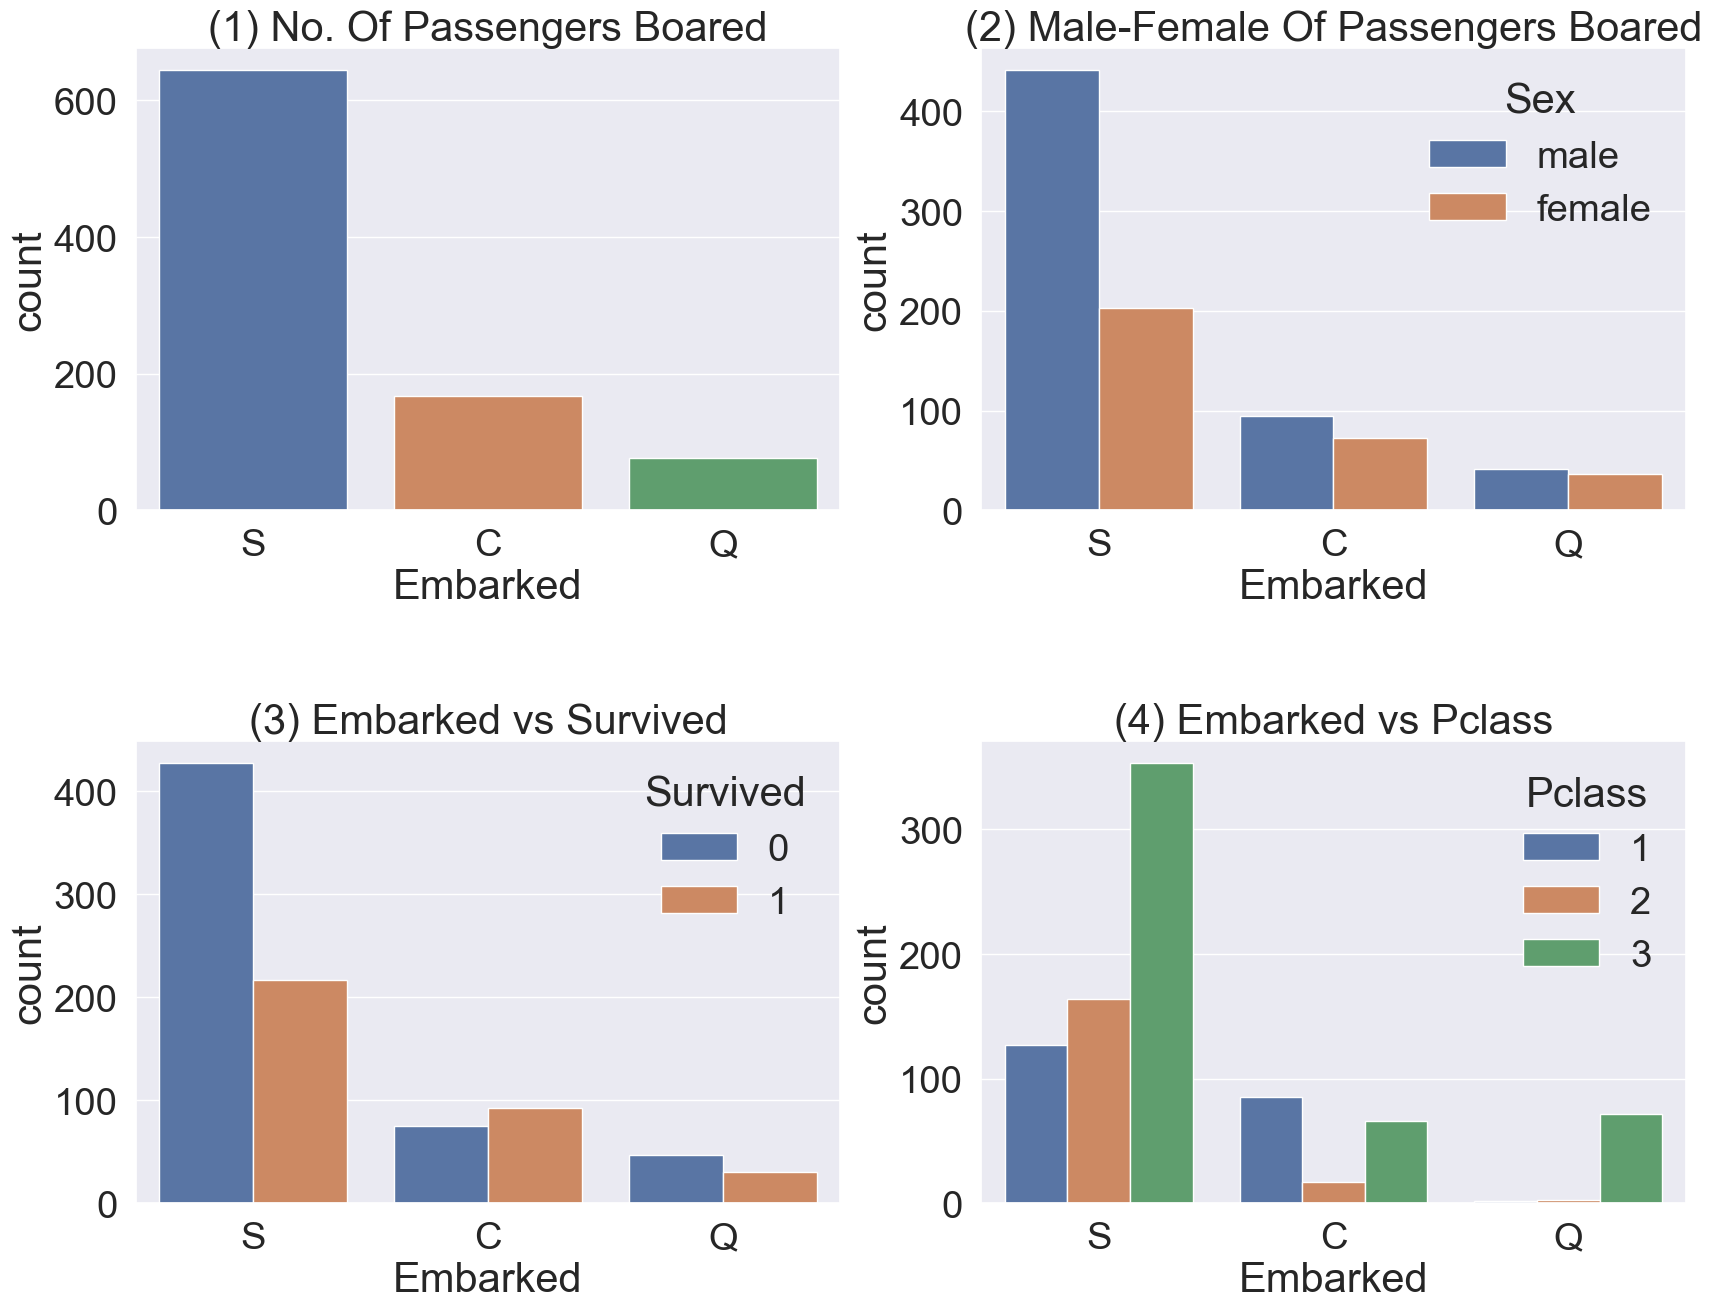

In [285]:
f,ax = plt.subplots(2,2,figsize=(20,15))

sns.countplot(data=df_train, x='Embarked',ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boared')

sns.countplot(data=df_train, x='Embarked', hue='Sex',ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Of Passengers Boared')

sns.countplot(data=df_train, x='Embarked', hue='Survived',ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot(data=df_train, x='Embarked', hue='Pclass',ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [477]:
df_train['Familysize'] = df_train['Parch'] + df_train['SibSp'] + 1

In [478]:
print(df_train['Familysize'].max())
print(df_train['Familysize'].min())

11
1


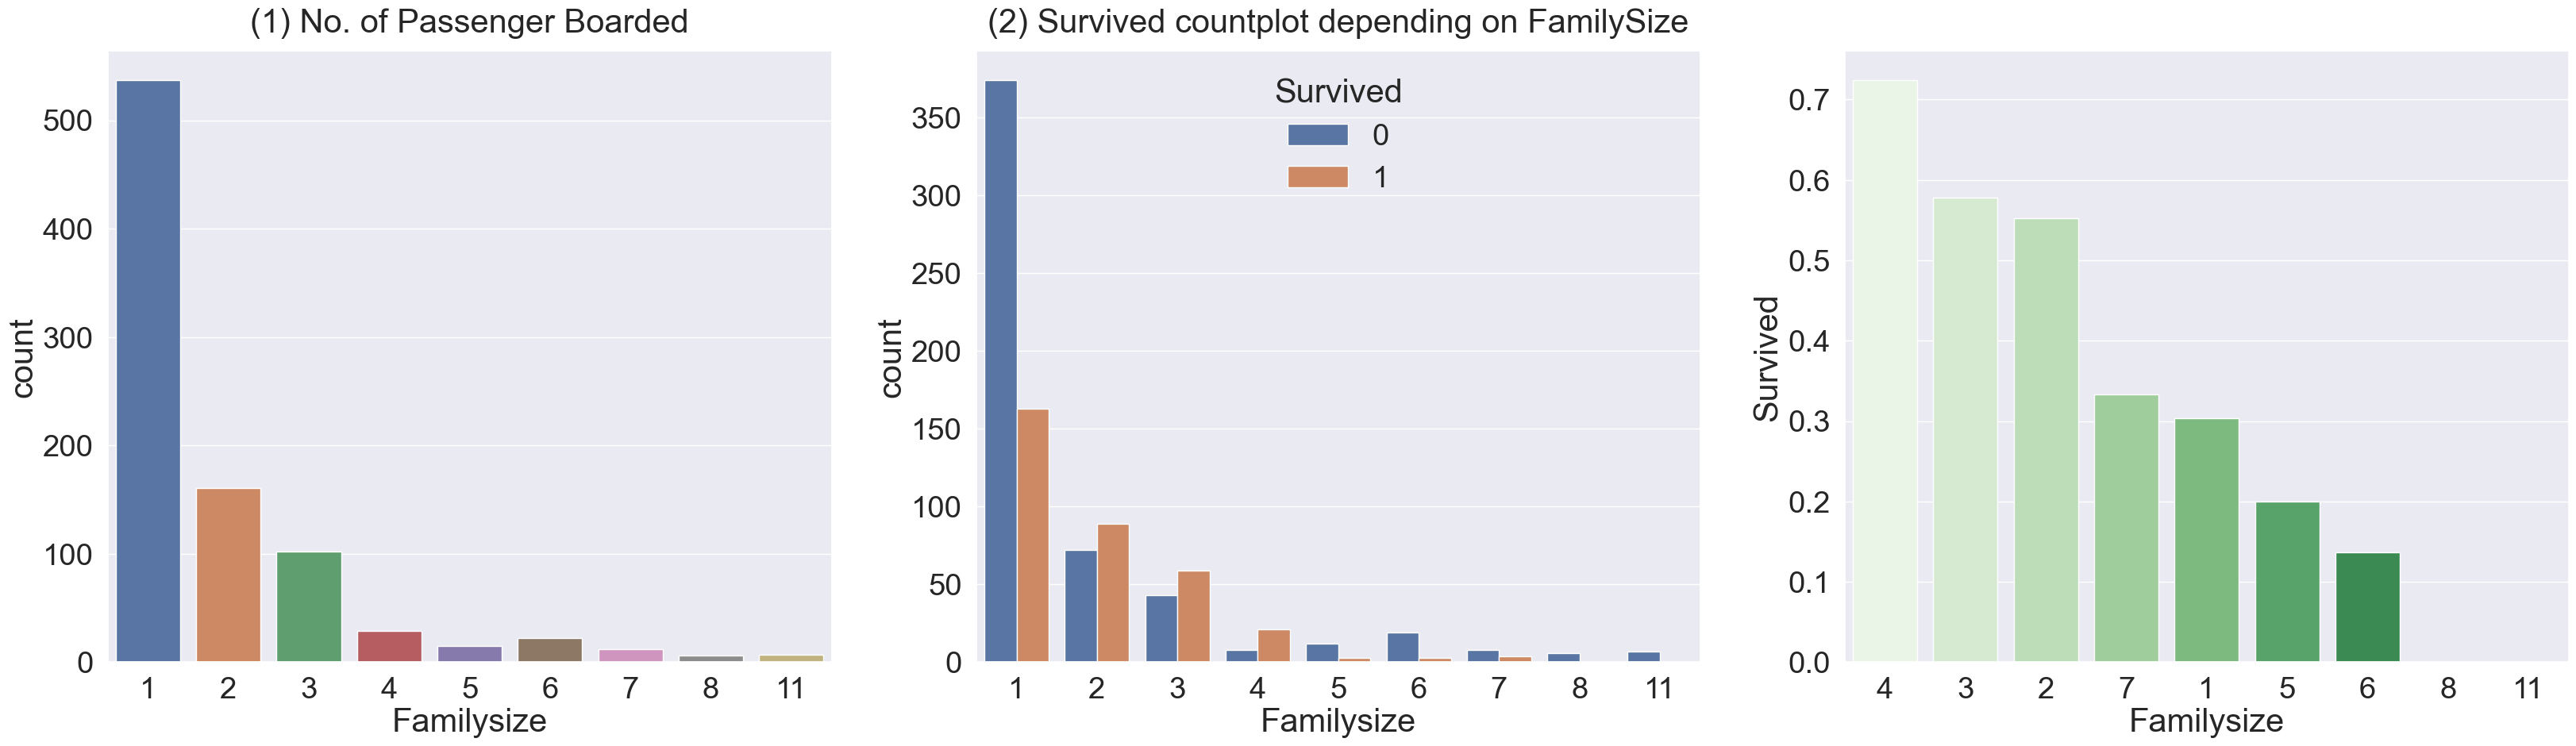

In [479]:
f,ax = plt.subplots(1,3,figsize=(40,10))
sns.countplot(data=df_train, x='Familysize',ax=ax[0])
ax[0].set_title('(1) No. of Passenger Boarded', y=1.02)

sns.countplot(data=df_train, x='Familysize',hue='Survived',ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',y=1.02)

sns.barplot(data=df_train[['Familysize','Survived']].groupby(by='Familysize',as_index=False).mean()
            ,x='Familysize',y='Survived',ax=ax[2],palette='Greens'
            ,order=df_train[['Familysize','Survived']].groupby(by='Familysize',as_index=False).mean().sort_values(by='Survived',ascending=False)['Familysize'].values)
plt.show()

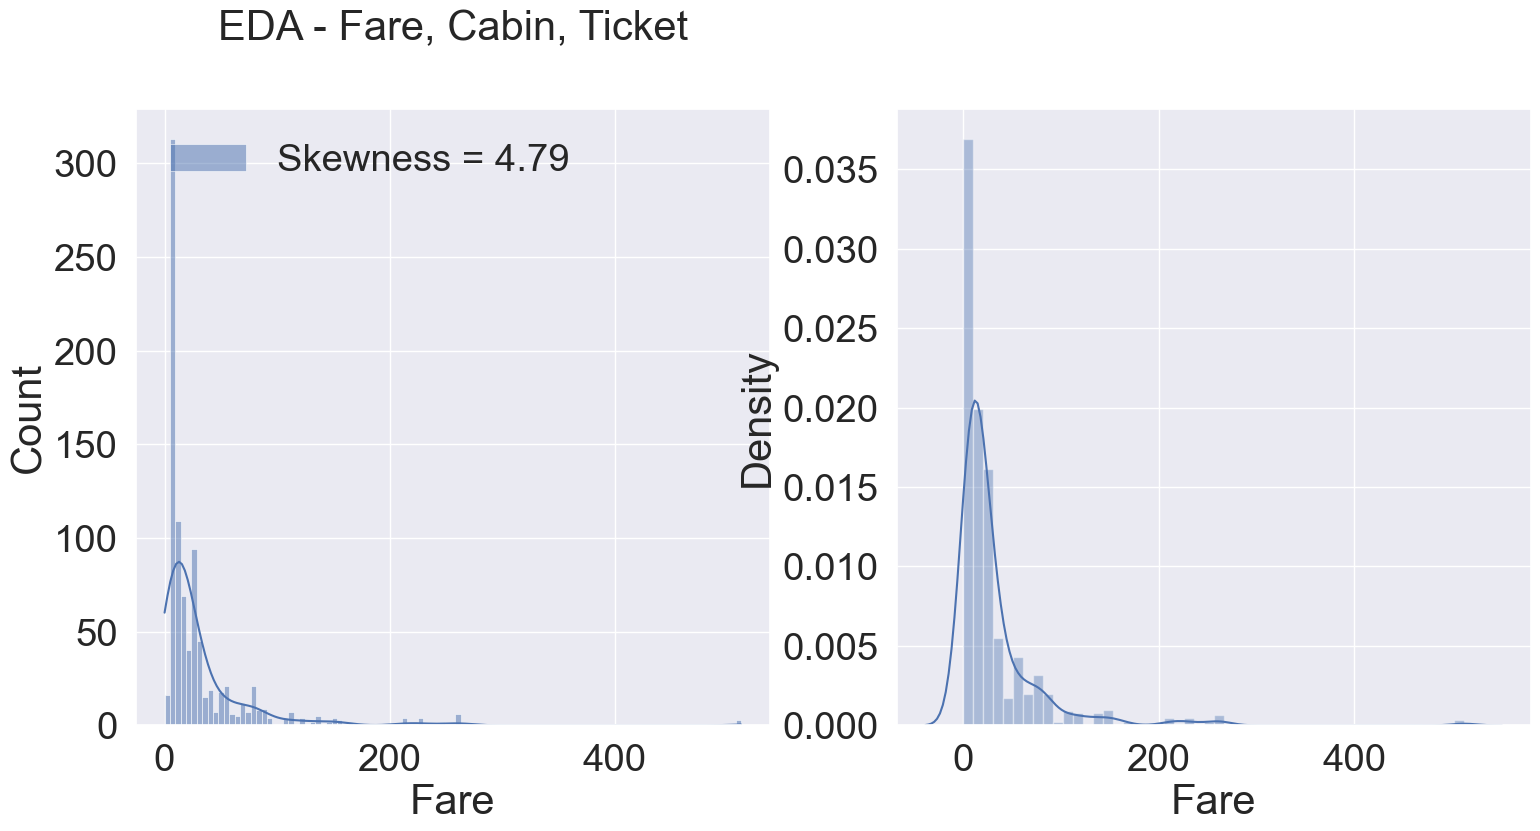

In [480]:
# distplot은 더이상 안쓰고 displot과 histplot을 쓰면 됨

y_position = 1.1
f, ax = plt.subplots(1,2,figsize=(18,8))

sns.histplot(data=df_train, x='Fare', ax=ax[0], color='b', kde=True, label='Skewness = {:.2f}'.format(df_train['Fare'].skew()))
sns.distplot(df_train['Fare'],ax=ax[1])
ax[0].set_title('EDA - Fare, Cabin, Ticket', y=y_position)
ax[0].legend(loc='upper left')
plt.show()

In [481]:
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i>0 else 0)

In [482]:
df_train['Fare'].skew()

0.44310881405404506

In [483]:
print(df_train['Age'].isnull().sum())
print(len(df_train['Age']))

177
891


In [484]:
df_train['Initial'] = df_train['Name'].str.extract('\, ([A-Za-z]+)\.')
df_test['Initial'] = df_test['Name'].str.extract('\, ([A-Za-z]+)\.')

In [485]:
pd.crosstab(df_test['Sex'],df_test['Initial']).style.background_gradient(cmap='summer')
# 
# ('([A-Za-z]*)\.')

Initial,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2


In [486]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)
df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [487]:
df_all = pd.concat([df_train, df_test])

In [488]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Mr'),'Age']=33
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Mrs'),'Age']=37
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Master'),'Age']=5
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Miss'),'Age']=22
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Other'),'Age']=45

In [489]:
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Mr'),'Age']=33
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Mrs'),'Age']=37
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Master'),'Age']=5
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Miss'),'Age']=22
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Other'),'Age']=45

In [490]:
df_train['Embarked'].fillna('S',inplace=True) # 그냥 제일 많았던게 S라서

In [491]:
df_train['Age_cat'] = pd.cut(df_train['Age'],list(range(0,100,10)),labels=[i for i in range(0,9)])
df_train.drop(['Age'],axis=1,inplace=True)

In [492]:
df_train['Initial']=df_train['Initial'].map({'Miss':1,'Mr':2,'Mrs':3,'Master':0,'Other':4})
df_test['Initial']=df_test['Initial'].map({'Miss':1,'Mr':2,'Mrs':3,'Master':0,'Other':4})

In [493]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0,'Q':1,'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0,'Q':1,'S':2})

In [494]:
df_train['Sex'] = df_train['Sex'].map({'female':0,'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0,'male':1})

In [495]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3.0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3.0,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0,0,211536,2.564949,NaN,2,1,4.0,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,0,112053,3.401197,B42,2,1,1.0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,2,W./C. 6607,3.154870,NaN,2,4,1.0,2
889,890,1,1,"Behr, Mr. Karl Howell",1,0,0,111369,3.401197,C148,0,1,2.0,2


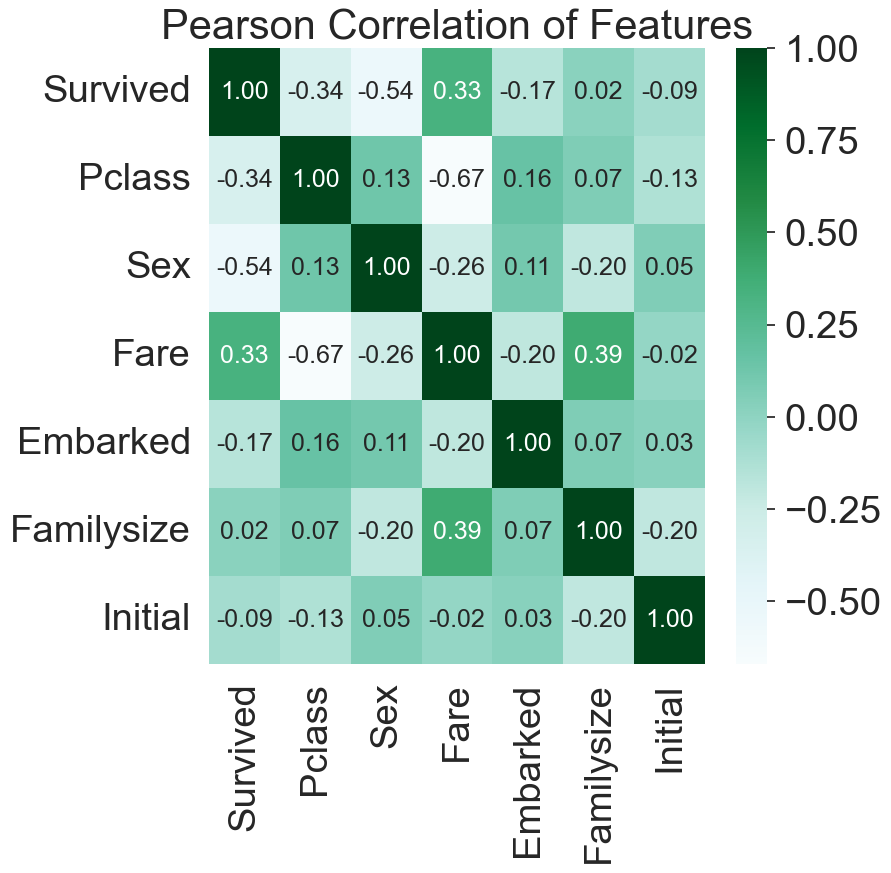

In [496]:
colormap = plt.cm.BuGn
plt.figure(figsize=(8,8))
plt.title('Pearson Correlation of Features')
sns.heatmap(data = df_train[['Survived','Pclass','Sex','Fare','Embarked','Familysize','Initial','Age_cat']].corr()
, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':18},fmt='.2f')

plt.show()

In [497]:
df_train = pd.get_dummies(df_train,columns=['Initial'],prefix='Initial')
df_test = pd.get_dummies(df_test,columns=['Initial'],prefix='Initial')
df_train = pd.get_dummies(df_train,columns=['Embarked'],prefix='Embarked')
df_test = pd.get_dummies(df_test,columns=['Embarked'],prefix='Embarked')

In [498]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)

In [499]:
df_train

,Survived,Pclass,Sex,Fare,Familysize,Age_cat,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Initial_4.0,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,2.564949,1,2,0,0,0,0,1,0,0,1
887,1,1,0,3.401197,1,1,0,1,0,0,0,0,0,1
888,0,3,0,3.154870,4,2,0,1,0,0,0,0,0,1
889,1,1,1,3.401197,1,2,0,0,1,0,0,1,0,0


In [500]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [501]:
X_train = df_train.drop(['Survived'],axis=1)
y_train = df_train['Survived']

X_test = df_test

In [502]:
X_tr,X_vld,y_tr,y_vld = train_test_split(X_train,y_train,test_size=0.3,random_state=42)

In [503]:
model = RandomForestClassifier()
model.fit(X_tr,y_tr)
prediction = model.predict(X_vld)


In [504]:
print(len(prediction))
print(metrics.accuracy_score(prediction, y_vld))

268
0.7835820895522388


In [510]:
# feature_importances = model.feature_importances_
# Series_feat_imp = pd.Series()
pd.Series(model.feature_importances_, index=df_test.columns)

ValueError: Length of values (13) does not match length of index (12)

In [512]:
df_test

,Pclass,Sex,Age,Fare,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,34.5,7.8292,0,0,1,0,0,0,1,0
1,3,0,47.0,7.0000,0,0,0,1,0,0,0,1
2,2,1,62.0,9.6875,0,0,1,0,0,0,1,0
3,3,1,27.0,8.6625,0,0,1,0,0,0,0,1
4,3,0,22.0,12.2875,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,33.0,8.0500,0,0,1,0,0,0,0,1
414,1,0,39.0,108.9000,0,0,1,0,0,1,0,0
415,3,1,38.5,7.2500,0,0,1,0,0,0,0,1
416,3,1,33.0,8.0500,0,0,1,0,0,0,0,1


In [513]:
df_train

,Survived,Pclass,Sex,Fare,Familysize,Age_cat,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Initial_4.0,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,2.564949,1,2,0,0,0,0,1,0,0,1
887,1,1,0,3.401197,1,1,0,1,0,0,0,0,0,1
888,0,3,0,3.154870,4,2,0,1,0,0,0,0,0,1
889,1,1,1,3.401197,1,2,0,0,1,0,0,1,0,0
